# Hybrid Audit Examples

These hypothetical elections follow the examples from CORLA18's `hybrid-audit-example-1.ipynb` and `hybrid-audit-example-2.ipynb`

In [1]:
import numpy as np

from assertion_audit_utils import TestNonnegMean
from fishers_combination import fisher_combined_pvalue, maximize_fisher_combined_pvalue, calculate_beta_range, create_modulus

## Example 1 - Medium sized election, close race

Reported results: 

Candidate | Stratum 1 | Stratum 2 | total 
---|---|---|---
A | 45,500 | 7,500 | 53,000
B | 49,500 | 1,500 | 51,000
Ballots | 100,000 | 10,000 | 110,000
Diluted margin | -4% | 60% | 1.8%

We want to limit the risk of certifying an incorrect outcome to at most $\alpha=10\%$. 

In the CVR stratum, we sample 750 ballots and find no overstatements. In the no-CVR stratum, we sample 500 ballots. We are unusually lucky and the vote proportions in the sample match those in the population. 

In [2]:
N_w1 = 45500
N_l1 = 49500
N_w2 = 7500
N_l2 = 1500
N1 = 100000
N2 = 10000

n1 = 500
n2 = 250

In [3]:
cvr_array_c = np.array([0]*int(n1*N_l1/N1)+[1]*int(n1*N_w1/N1)+ [1/2]*int(n1*(N1-N_l1-N_w1)/N1))

# 0 o1, o2, u1, u2
cvr_array_m = np.array([0]*int(n1*N_l1/N1)+[1]*int(n1*N_w1/N1)+ [1/2]*int(n1*(N1-N_l1-N_w1)/N1))

overstatement = cvr_array_c-cvr_array_m
margin = 2*np.mean(cvr_array_c)-1
cvr_array = (1-overstatement)/(2-margin)

nocvr_array = np.array([0]*int(n2*N_l2/N2)+[1]*int(n2*N_w2/N2)+ [1/2]*int(n2*(N2-N_l2-N_w2)/N2))

In [4]:
g_0 = 0.5
upper_bound = 1
beta_test_count = 20
risk_fns = ["kaplan_markov", "kaplan_markov"]
alpha = 0.10

cvr_pvalue_0 = lambda t_0: TestNonnegMean.kaplan_markov(x=cvr_array, t=1/2 + \
                (t_0 - 1/2)/(2*upper_bound - margin), g=g_0, random_order=False)
cvr_pvalue = lambda beta: cvr_pvalue_0(t_0=beta*(N1+N2)/N1)
nocvr_pvalue = lambda beta: TestNonnegMean.kaplan_markov(x=nocvr_array, \
                t=(1/2-beta)*(N1+N2)/N2, g=g_0, random_order=False)


beta limits:  (0.40909090909090906, 0.5)


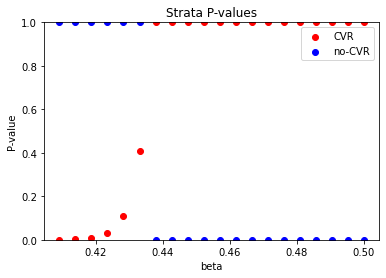

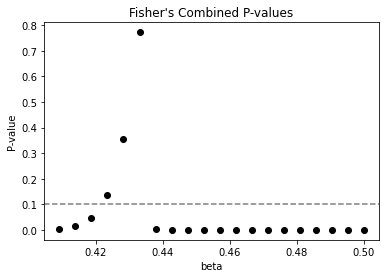

{&#39;max_pvalue&#39;: 0.7721151303999657,
 &#39;min_chisq&#39;: 1.8020070509531376,
 &#39;allocation beta&#39;: 0.43301435406698563,
 &#39;tol&#39;: None,
 &#39;stepsize&#39;: 0.004329004329004331,
 &#39;refined&#39;: False}

In [5]:
(beta_lower, beta_upper) = calculate_beta_range(N1, N2)
print('beta limits: ', (beta_lower, beta_upper))

mod = create_modulus(risk_fns, N1, N2, n1, n2, margin, upper_bound, g_0, cvr_array, nocvr_array)

maximize_fisher_combined_pvalue(N1, N2, pvalue_funs=[cvr_pvalue, nocvr_pvalue], beta_test_count=beta_test_count, modulus=mod, alpha=alpha, feasible_beta_range=(beta_lower, beta_upper), plot=True)

Since the $P$-value is greater than the desired risk limit, a larger sample size is needed. We can arbitrarily sample an additional 50% of the original sample size from each strata. 

In the CVR stratum, we sample 750 ballots and find no overstatements. In the no-CVR stratum, we sample 375 ballots. Both strata match the population proportions. 

In [6]:
n1 = 750
n2 = 375

In [7]:
cvr_array_c = np.array([0]*int(n1*N_l1/N1)+[1]*int(n1*N_w1/N1)+ [1/2]*int(n1*(N1-N_l1-N_w1)/N1))

# 0 o1, o2, u1, u2
cvr_array_m = np.array([0]*int(n1*N_l1/N1)+[1]*int(n1*N_w1/N1)+ [1/2]*int(n1*(N1-N_l1-N_w1)/N1))

overstatement = cvr_array_c-cvr_array_m
margin = 2*np.mean(cvr_array_c)-1
cvr_array = (1-overstatement)/(2-margin)

nocvr_array = np.array([0]*int(n2*N_l2/N2)+[1]*int(n2*N_w2/N2)+ [1/2]*int(n2*(N2-N_l2-N_w2)/N2))

In [8]:
cvr_pvalue_0 = lambda t_0: TestNonnegMean.kaplan_markov(x=cvr_array, t=1/2 + \
                (t_0 - 1/2)/(2*upper_bound - margin), g=g_0, random_order=False)
cvr_pvalue = lambda beta: cvr_pvalue_0(t_0=beta*(N1+N2)/N1)
nocvr_pvalue = lambda beta: TestNonnegMean.kaplan_markov(x=nocvr_array, \
                t=(1/2-beta)*(N1+N2)/N2, g=g_0, random_order=False)

beta limits:  (0.40909090909090906, 0.5)


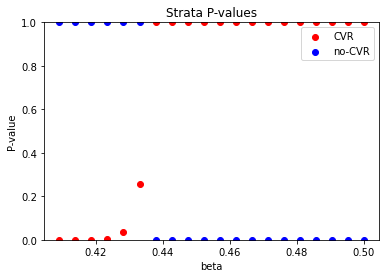

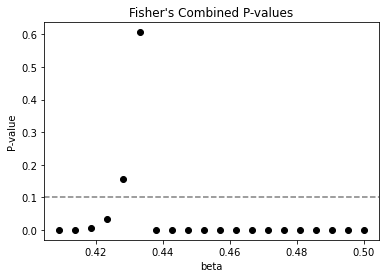

{&#39;max_pvalue&#39;: 0.6066320507139218,
 &#39;min_chisq&#39;: 2.714772786787764,
 &#39;allocation beta&#39;: 0.43301435406698563,
 &#39;tol&#39;: None,
 &#39;stepsize&#39;: 0.004329004329004331,
 &#39;refined&#39;: False}

In [9]:
(beta_lower, beta_upper) = calculate_beta_range(N1, N2)
print('beta limits: ', (beta_lower, beta_upper))

mod = create_modulus(risk_fns, N1, N2, n1, n2, margin, upper_bound, g_0, cvr_array, nocvr_array)

maximize_fisher_combined_pvalue(N1, N2, pvalue_funs=[cvr_pvalue, nocvr_pvalue], beta_test_count=beta_test_count, modulus=mod, alpha=alpha, feasible_beta_range=(beta_lower, beta_upper), plot=True)

The maximum $P$-value still exceeds the desired risk limit. An even larger sample size or a full hand count is required. 

## Example 2 - Large sized election, large margin 

Reported results: 

Candidate | Stratum 1 | Stratum 2 | total 
---|---|---|---
A | 1,102,000 | 42,500 | 1,144,500
B | 703,000 |  52,500 | 755,500
Ballots | 1,900,000 | 100,000 | 2,000,000
Diluted margin | 21% | -10% | 19.45%

We want to limit the risk of certifying an incorrect outcome to at most $\alpha=5\%$. 

In the CVR stratum, we sample 50 ballots and find no overstatements. In the no-CVR stratum, we sample 25 ballots. Both strata reflect the population's proportions.  

In [10]:
N1 = 1900000
N2 = 100000
N_w1 = 1102000
N_l1 = 703000
N_w2 = 42500
N_l2= 52500

n1 = 50
n2 = 25

In [11]:
cvr_array_c = np.array([0]*int(n1*N_l1/N1)+[1]*int(n1*N_w1/N1)+ [1/2]*int(n1*(N1-N_l1-N_w1)/N1))

# 0 o1, o2, u1, u2
cvr_array_m = np.array([0]*int(n1*N_l1/N1)+[1]*int(n1*N_w1/N1)+ [1/2]*int(n1*(N1-N_l1-N_w1)/N1))

overstatement = cvr_array_c-cvr_array_m
margin = 2*np.mean(cvr_array_c)-1
cvr_array = (1-overstatement)/(2-margin)

nocvr_array = np.array([0]*int(n2*N_l2/N2)+[1]*int(n2*N_w2/N2)+ [1/2]*int(n2*(N2-N_l2-N_w2)/N2))

In [12]:
g_0 = 0.5
upper_bound = 1
beta_test_count = 10
risk_fns = ["kaplan_markov", "kaplan_markov"]
alpha = 0.05

cvr_pvalue_0 = lambda t_0: TestNonnegMean.kaplan_markov(x=cvr_array, t=1/2 + \
                (t_0 - 1/2)/(2*upper_bound - margin), g=g_0, random_order=False)
cvr_pvalue = lambda beta: cvr_pvalue_0(t_0=beta*(N1+N2)/N1)
nocvr_pvalue = lambda beta: TestNonnegMean.kaplan_markov(x=nocvr_array, \
                t=(1/2-beta)*(N1+N2)/N2, g=g_0, random_order=False)

beta limits:  (0.45, 0.5)


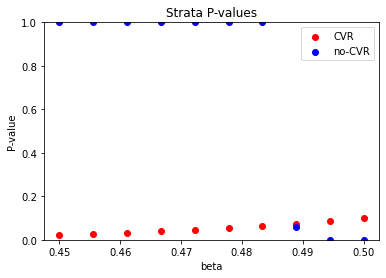

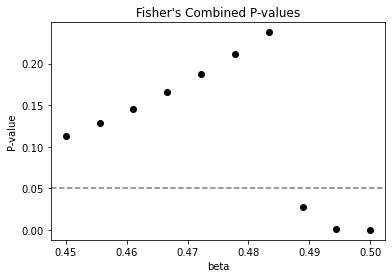

{&#39;max_pvalue&#39;: 0.23758660564540457,
 &#39;min_chisq&#39;: 5.524473438651018,
 &#39;allocation beta&#39;: 0.48333333333333334,
 &#39;tol&#39;: None,
 &#39;stepsize&#39;: 0.004545454545454544,
 &#39;refined&#39;: False}

In [13]:
(beta_lower, beta_upper) = calculate_beta_range(N1, N2)
print('beta limits: ', (beta_lower, beta_upper))

mod = create_modulus(risk_fns, N1, N2, n1, n2, margin, upper_bound, g_0, cvr_array, nocvr_array)

maximize_fisher_combined_pvalue(N1, N2, pvalue_funs=[cvr_pvalue, nocvr_pvalue], beta_test_count=beta_test_count, modulus=mod, alpha=alpha, feasible_beta_range=(beta_lower, beta_upper), plot=True)

Since the $P$-value is greater than the desired risk limit, a larger sample size is needed. 

This second audit has double the sample size. In the CVR stratum, we sample 100 ballots and find no overstatements. In the no-CVR stratum, we sample 50 ballots. We are unusually lucky and the vote proportions in the sample match those in the population. 

In [14]:
n1 = 100
n2 = 50

In [15]:
cvr_array_c = np.array([0]*int(n1*N_l1/N1)+[1]*int(n1*N_w1/N1)+ [1/2]*int(n1*(N1-N_l1-N_w1)/N1))

# 0 o1, o2, u1, u2
cvr_array_m = np.array([0]*int(n1*N_l1/N1)+[1]*int(n1*N_w1/N1)+ [1/2]*int(n1*(N1-N_l1-N_w1)/N1))

overstatement = cvr_array_c-cvr_array_m
margin = 2*np.mean(cvr_array_c)-1
cvr_array = (1-overstatement)/(2-margin)

nocvr_array = np.array([0]*int(n2*N_l2/N2)+[1]*int(n2*N_w2/N2)+ [1/2]*int(n2*(N2-N_l2-N_w2)/N2))

In [16]:
cvr_pvalue_0 = lambda t_0: TestNonnegMean.kaplan_markov(x=cvr_array, t=1/2 + \
                (t_0 - 1/2)/(2*upper_bound - margin), g=g_0, random_order=False)
cvr_pvalue = lambda beta: cvr_pvalue_0(t_0=beta*(N1+N2)/N1)
nocvr_pvalue = lambda beta: TestNonnegMean.kaplan_markov(x=nocvr_array, \
                t=(1/2-beta)*(N1+N2)/N2, g=g_0, random_order=False)

beta limits:  (0.45, 0.5)


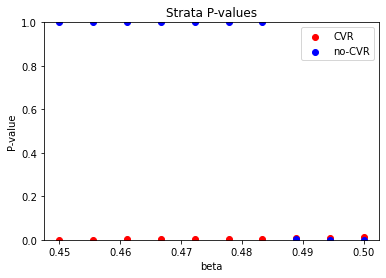

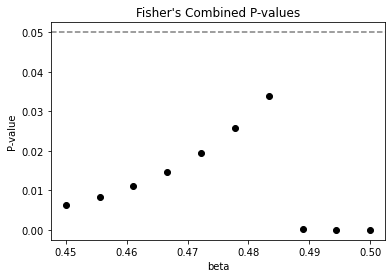

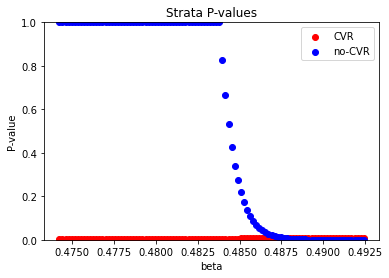

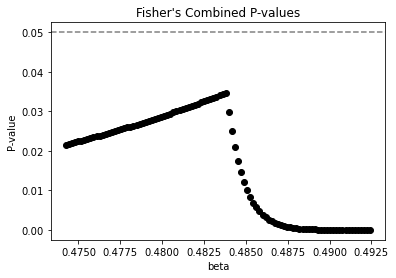

{&#39;max_pvalue&#39;: 0.0346471677699266,
 &#39;min_chisq&#39;: 10.369203879449028,
 &#39;allocation beta&#39;: 0.48379247015610655,
 &#39;stepsize&#39;: 0.00018001800180018006,
 &#39;tol&#39;: 0.38056066614779005,
 &#39;refined&#39;: True}

In [17]:
(beta_lower, beta_upper) = calculate_beta_range(N1, N2)
print('beta limits: ', (beta_lower, beta_upper))

mod = create_modulus(risk_fns, N1, N2, n1, n2, margin, upper_bound, g_0, cvr_array, nocvr_array)

maximize_fisher_combined_pvalue(N1, N2, pvalue_funs=[cvr_pvalue, nocvr_pvalue], beta_test_count=beta_test_count, modulus=mod, alpha=alpha, feasible_beta_range=(beta_lower, beta_upper), plot=True)

The $P$-value is rigorously below the risk limit and we can confirm that the outcome of the election was indeed correct. 

## Example 3 - Large sized election, exact tie

Reported results: 

Candidate | Reported Stratum 1 |  Reported Stratum 2 | Reported total 
---|---|---|---
A | 960,000 | 51,000 | 1,011,000
B | 940,000 | 49,000 | 989,000
Ballots | 1,900,000 | 100,000 | 2,000,000
Diluted margin | 1.05% | 2% | 1.1%

The true ballot count shows that there is an exact tie between the candidates. 

We want to limit the risk of certifying an incorrect outcome to at most $\alpha=5\%$. 

In the CVR stratum, we sample 3800 ballots and find 22 2-vote overstatements. In the no-CVR stratum, we sample 200 ballots. Both strata reflect the population's proportions.  

In [18]:
N1 = 1900000
N2 = 100000
N_w1 = 960000
N_w2 = 51000
N_l1 = 940000
N_l2 = 49000

n1 = 3800
n2 = 200

In [19]:
cvr_array_c = np.array([0]*int(n1*N_l1/N1)+[1]*int(n1*N_w1/N1)+ [1/2]*int(n1*(N1-N_l1-N_w1)/N1))

# 22 o2
cvr_array_m = np.array([0]*(int(n1*N_l1/N1)+22)+[1]*(int(n1*N_w1/N1)-22)+ [1/2]*int(n1*(N1-N_l1-N_w1)/N1))

overstatement = cvr_array_c-cvr_array_m
margin = 2*np.mean(cvr_array_c)-1
cvr_array = (1-overstatement)/(2-margin)

nocvr_array = np.array([0]*int(n2*N_l2/N2)+[1]*int(n2*N_w2/N2)+ [1/2]*int(n2*(N2-N_l2-N_w2)/N2))

In [20]:
g_0 = 0.5
upper_bound = 1
beta_test_count = 20
risk_fns = ["kaplan_markov", "kaplan_markov"]
alpha = 0.05

cvr_pvalue_0 = lambda t_0: TestNonnegMean.kaplan_markov(x=cvr_array, t=1/2 + \
                (t_0 - 1/2)/(2*upper_bound - margin), g=g_0, random_order=False)
cvr_pvalue = lambda beta: cvr_pvalue_0(t_0=beta*(N1+N2)/N1)
nocvr_pvalue = lambda beta: TestNonnegMean.kaplan_markov(x=nocvr_array, \
                t=(1/2-beta)*(N1+N2)/N2, g=g_0, random_order=False)

beta limits:  (0.45, 0.5)


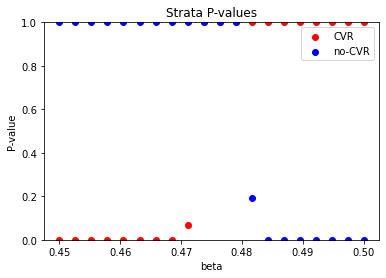

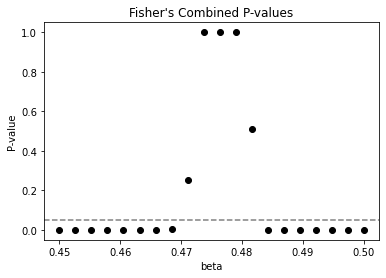

{&#39;max_pvalue&#39;: 1.0,
 &#39;min_chisq&#39;: 0.0,
 &#39;allocation beta&#39;: 0.4736842105263158,
 &#39;tol&#39;: None,
 &#39;stepsize&#39;: 0.0023809523809523803,
 &#39;refined&#39;: False}

In [21]:
(beta_lower, beta_upper) = calculate_beta_range(N1, N2)
print('beta limits: ', (beta_lower, beta_upper))

mod = create_modulus(risk_fns, N1, N2, n1, n2, margin, upper_bound, g_0, cvr_array, nocvr_array)

maximize_fisher_combined_pvalue(N1, N2, pvalue_funs=[cvr_pvalue, nocvr_pvalue], beta_test_count=beta_test_count, modulus=mod, alpha=alpha, feasible_beta_range=(beta_lower, beta_upper), plot=True)

Another audit using double the sample size does not decrease the $P$-value. 

In the CVR stratum 7600 ballots are sampled with 44 overstatements. In the no CVR stratum 400 ballots are sampled. In both strata, the ballots drawn reflect the true population proportions. 

In [22]:
n1 = 7600
n2 = 400

In [23]:
cvr_array_c = np.array([0]*int(n1*N_l1/N1)+[1]*int(n1*N_w1/N1)+ [1/2]*int(n1*(N1-N_l1-N_w1)/N1))

# 44 o2
cvr_array_m = np.array([0]*(int(n1*N_l1/N1)+44)+[1]*(int(n1*N_w1/N1)-44)+ [1/2]*int(n1*(N1-N_l1-N_w1)/N1))

overstatement = cvr_array_c-cvr_array_m
margin = 2*np.mean(cvr_array_c)-1
cvr_array = (1-overstatement)/(2-margin)

nocvr_array = np.array([0]*int(n2*N_l2/N2)+[1]*int(n2*N_w2/N2)+ [1/2]*int(n2*(N2-N_l2-N_w2)/N2))

In [24]:
cvr_pvalue_0 = lambda t_0: TestNonnegMean.kaplan_markov(x=cvr_array, t=1/2 + \
                (t_0 - 1/2)/(2*upper_bound - margin), g=g_0, random_order=False)
cvr_pvalue = lambda beta: cvr_pvalue_0(t_0=beta*(N1+N2)/N1)
nocvr_pvalue = lambda beta: TestNonnegMean.kaplan_markov(x=nocvr_array, \
                t=(1/2-beta)*(N1+N2)/N2, g=g_0, random_order=False)

beta limits:  (0.45, 0.5)


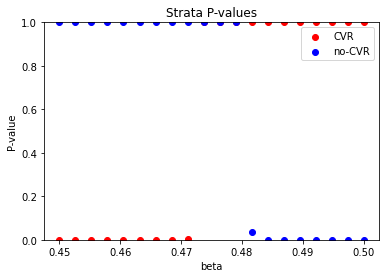

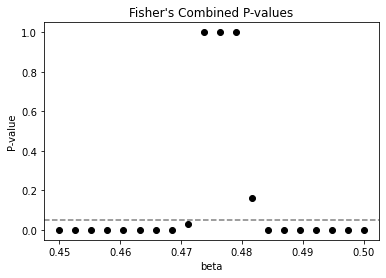

{&#39;max_pvalue&#39;: 1.0,
 &#39;min_chisq&#39;: 0.0,
 &#39;allocation beta&#39;: 0.4736842105263158,
 &#39;tol&#39;: None,
 &#39;stepsize&#39;: 0.0023809523809523803,
 &#39;refined&#39;: False}

In [25]:
(beta_lower, beta_upper) = calculate_beta_range(N1, N2)
print('beta limits: ', (beta_lower, beta_upper))

mod = create_modulus(risk_fns, N1, N2, n1, n2, margin, upper_bound, g_0, cvr_array, nocvr_array)

maximize_fisher_combined_pvalue(N1, N2, pvalue_funs=[cvr_pvalue, nocvr_pvalue], beta_test_count=beta_test_count, modulus=mod, alpha=alpha, feasible_beta_range=(beta_lower, beta_upper), plot=True)